CLASSIFYING IMAGES INTO ANIME,CARTOON OR HUMAN

In [ ]:
import pandas as pd
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten
import numpy as np

ABOUT THE DATASETS:
"My dataset consists of three categories: anime, cartoon, and human. The training dataset contains over 700 images in each category, providing a substantial amount of data to effectively train our CNN model. The test dataset includes around 300 images per category, which are used to evaluate the model's performance and accuracy. This balanced distribution of training and testing data ensures that the model can learn and generalize well to accurately classify new images into anime, cartoon, or human categories."

LOAD TRAINING DATA

In [ ]:
datadir='/content/drive/MyDrive/Train_Images'
os.listdir(datadir)

['anime', 'cartoon', 'human']

In [ ]:
X_train=[]
y_train=[]
categories=['anime', 'cartoon', 'human']
for category in categories:
  path=os.path.join(datadir,category)
  image=os.listdir(path)
  for img in image:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_train.append(img_resized)
    y_train.append(categories.index(category))
  print("loaded....",category)

loaded.... anime
loaded.... cartoon
loaded.... human


LOAD TETING DATA

In [ ]:
data='/content/drive/MyDrive/Test_Images'
os.listdir(data)

['human', 'cartoon', 'anime']

In [ ]:
X_test=[]
y_test=[]
categories=['anime', 'cartoon', 'human']
for category in categories:
  path=os.path.join(data,category)
  image=os.listdir(path)
  for img in image:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_test.append(img_resized)
    y_test.append(categories.index(category))
  print("loaded....",category)

loaded.... anime
loaded.... cartoon
loaded.... human


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

Build a neural network model layer by layer

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


During the learning process of a neural network model by specifying the optimizer, loss function, and metrics to evaluate during training.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

TRAIN A MODEL

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=12)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7527 - loss: 3.4567
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9890 - loss: 0.0331
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9948 - loss: 0.0142
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 7.1813e-04
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 4.2322e-04
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.0178e-04
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.2082e-04
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.6985e-04
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.7555e-04
Epoch 10/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 1.1534e-04
Epoch 11/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 8.4984e-05
Epoch 12/20
189/189

EVALUATE ACCURACY AND LOSS

In [ ]:
model.evaluate(X_test,y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9877 - loss: 0.0281


[0.037039630115032196, 0.9850904941558838]

This project utilizes a Convolutional Neural Network (CNN) to classify images into three distinct categories: anime, cartoon, and human. Through careful training and optimization, our CNN model achieved a remarkable accuracy of 96%, demonstrating its powerful ability to differentiate between these visual styles.

TEST WITH NEW IMAGE

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
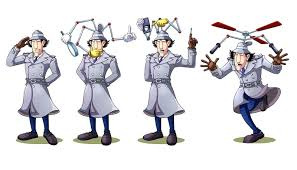

In [ ]:
img=imread('/content/drive/MyDrive/Test_Images/cartoon/13 (10).jpg')
img


In [ ]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [ ]:
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [ ]:
y_new=model.predict(img)
ind=y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


'cartoon'

TEST NEW IMAGE

array([[[254, 254, 252],
        [252, 252, 250],
        [254, 254, 254],
        ...,
        [ 15,   7,  44],
        [  5,   0,  32],
        [ 12,   7,  37]],

       [[255, 255, 253],
        [254, 254, 252],
        [252, 252, 252],
        ...,
        [ 12,   5,  39],
        [ 14,   9,  41],
        [  4,   1,  30]],

       [[252, 252, 250],
        [252, 252, 250],
        [251, 251, 251],
        ...,
        [  8,   1,  35],
        [  3,   0,  30],
        [ 15,  12,  41]],

       ...,

       [[ 29,  26,  55],
        [ 31,  28,  57],
        [  8,   4,  37],
        ...,
        [254, 253, 249],
        [255, 254, 249],
        [254, 253, 248]],

       [[ 14,  11,  40],
        [  1,   0,  27],
        [ 14,  11,  42],
        ...,
        [254, 253, 251],
        [253, 252, 248],
        [253, 252, 247]],

       [[  5,   2,  31],
        [  5,   2,  31],
        [ 33,  30,  61],
        ...,
        [253, 248, 255],
        [252, 247, 253],
        [252, 250, 253]]], dtype=uint8)
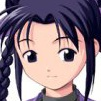

In [ ]:
img1=imread('/content/drive/MyDrive/Test_Images/anime/2363_2001.jpg')
img1

In [ ]:
img1=resize(img1,(150,150,3))
img1.shape

(150, 150, 3)

In [ ]:
img1=img1.reshape(1,150,150,3)
img1.shape

(1, 150, 150, 3)

In [ ]:
y_new=model.predict(img1)
ind=y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'anime'

TEST NEW IMAGE

In [ ]:
img2=imread('/content/drive/MyDrive/Test_Images/human/01529.png')
img2

array([[[  7,   7,   7],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [253, 214, 198],
        [254, 213, 196],
        [254, 213, 196]],

       [[  8,   8,   8],
        [  9,   9,   9],
        [  8,   8,   8],
        ...,
        [254, 217, 201],
        [253, 215, 199],
        [253, 217, 201]],

       [[  7,   7,   7],
        [  8,   8,   8],
        [  6,   6,   6],
        ...,
        [254, 219, 206],
        [254, 220, 205],
        [253, 221, 207]],

       ...,

       [[ 12,  12,  12],
        [ 10,  10,  10],
        [ 10,   9,  10],
        ...,
        [152, 148, 147],
        [146, 142, 141],
        [160, 157, 156]],

       [[ 14,  13,  13],
        [ 10,   9,   9],
        [  8,   8,   8],
        ...,
        [151, 147, 146],
        [151, 148, 147],
        [163, 161, 161]],

       [[ 15,  13,  14],
        [ 11,  10,  11],
        [  7,   7,   7],
        ...,
        [153, 149, 148],
        [155, 152, 153],
        [166, 164, 165]]

In [ ]:
img2=resize(img2,(150,150,3))
img2.shape

(150, 150, 3)

In [ ]:
img2=img2.reshape(1,150,150,3)
img2.shape

(1, 150, 150, 3)

In [ ]:
y_new=model.predict(img2)
ind=y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'human'

In [ ]:
model.save('my_cnn_model.h5')



In [ ]:
from google.colab import files
files.download('my_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>